<a href="https://colab.research.google.com/github/sc-dataman/DL_NNets/blob/master/v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#df = pd.read_csv('NSE-TATAGLOBAL(1).csv')

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





 - 59s - loss: 0.0033


In [0]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
#df = pd.read_csv('NSE-TATAGLOBAL(1).csv')


Saving NSE-TATAGLOBAL11.csv to NSE-TATAGLOBAL11 (1).csv


In [0]:

import io
df = pd.read_csv(io.BytesIO(uploaded['NSE-TATAGLOBAL11.csv']))
df.head(5)
# Dataset is now stored in a Pandas Dataframe

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


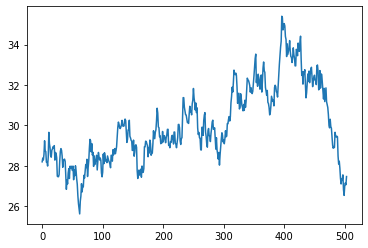

In [13]:
from __future__ import division
from random import gauss
from math import exp, sqrt
from matplotlib import pyplot as plt

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

# USER INPUT
S0 = 28.65 # underlying price
v = 0.2076 # vol of 20.76%
mu = 0.02 # mu
dt = 1/252 # 1 day
T = 2 # period end
n = int(T/dt) # number of steps

S_path=[]
S=S0 # starting price
for i in range(1,n+1):
    S_t = generate_asset_price(S,v,mu,dt)
    S= S_t
    S_path.append(S_t)

plt.plot(S_path)

In [16]:
dim(S_path)

NameError: ignored

In [0]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates = []
prices = []

def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	# skipping column names
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return

def predict_price(dates, prices, x):
	dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

	svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
	svr_lin = SVR(kernel= 'linear', C= 1e3, gamma = 'auto')
	svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2, gamma = 'auto')
	svr_rbf.fit(dates, prices) # fitting the data points in the models
	svr_lin.fit(dates, prices)
	svr_poly.fit(dates, prices)

	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
	plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
	plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
	plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

	return svr_rbf.predict(np.array(x).reshape(-1,1))[0], svr_lin.predict(np.array(x).reshape(-1,1))[0], svr_poly.predict(np.array(x).reshape(-1,1))[0]

get_data('goog.csv') # calling get_data method by passing the csv file to it
print("Dates- ", dates)
print("Prices- ", prices)

predicted_price = predict_price(dates, prices, 29)  
print("\nThe stock open price for 29th Feb is:")
print("RBF kernel: $", str(predicted_price[0]))
print("Linear kernel: $", str(predicted_price[1]))
print("Polynomial kernel: $", str(predicted_price[2]))
	 


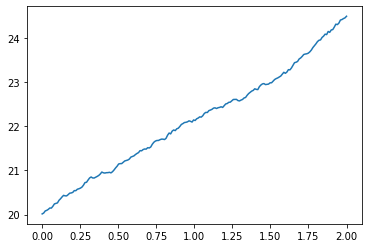

In [7]:
import matplotlib.pyplot as plt
plt.plot(t, S)
plt.show()